In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import 
import matplotlib.pyplot as plt

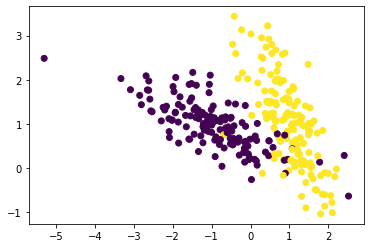

In [ ]:
x,y = make_classification(n_samples=300,n_features=2,n_classes=2,
                          n_redundant=0,n_informative=2,
                          n_clusters_per_class=1,random_state=48)

plt.scatter(x[:,0],x[:,1],c=y)

### Hiperparámetros de clasificadores KNN

**weights**: uniform, distance

**metric**: puede ser cualquiera de las descriptas aca:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

Observar que hay distancias o metricas para distintos tipos de variables:
reales, enteras, categoricas, etc...

Cada metrica asume una cierta distribucion de los datos, por ejemplo, euclidea asume normalidad de los datos. A su vez, se puede tener en cuenta la interpretabilidad de las distancias.

### Efecto del K

'Zoom en [(0,1),(0,1)]'

Text(0.5, 1.0, 'K = 250')

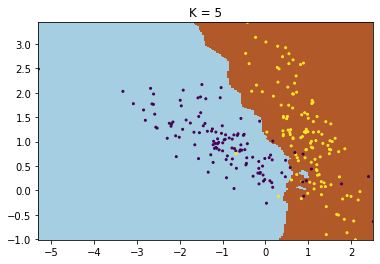

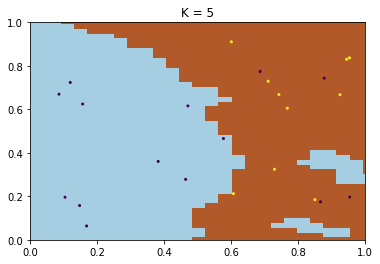

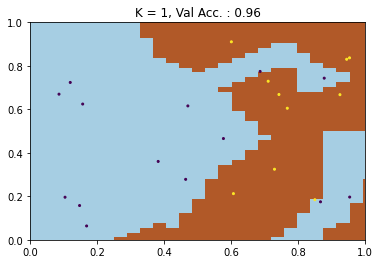

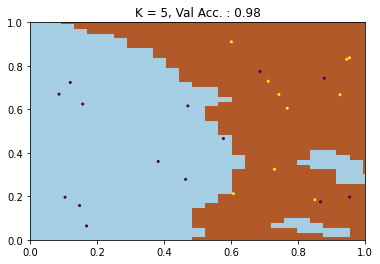

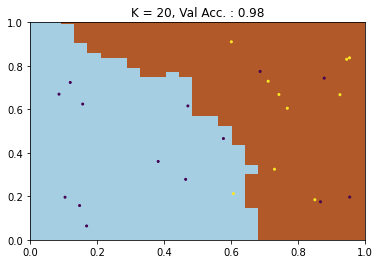

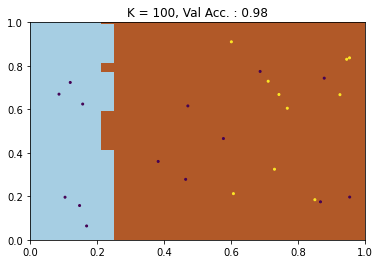

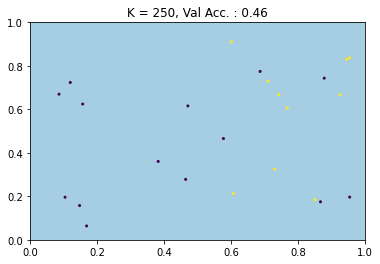

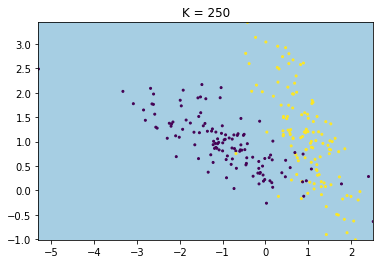

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train = x[:250]
y_train = y[:250]
x_val = x[250:]
y_val = y[250:]

knn_model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',p=2)
knn_model.fit(x_train,y_train)

h=200
xx, yy = np.meshgrid(np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), h), np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]), h))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1)
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)
plt.title('K = 5')

display('Zoom en [(0,1),(0,1)]')
plt.figure()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)
plt.xlim((0,1))
plt.ylim((0,1))
plt.title('K = 5')

metrics = []

for i in [1,5,20,100,250]:
  knn_model = KNeighborsClassifier(n_neighbors=i,weights='uniform',metric='minkowski',p=2)
  knn_model.fit(x_train,y_train)

  h=200
  xx, yy = np.meshgrid(np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), h), np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]), h))
  Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure()
  plt.imshow(Z, interpolation="nearest",
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired, aspect="auto", origin="lower")

  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)
  plt.xlim((0,1))
  plt.ylim((0,1))
  
  y_pred = knn_model.predict(x_val)
  acc = accuracy_score(y_val,y_pred)
  metrics.append(acc)

  plt.title('K = {}, Val Acc. : {}'.format(i,acc))

plt.figure()
plt.imshow(Z, interpolation="nearest",
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)
plt.title('K = {}'.format(i))

### Efecto de los pesos

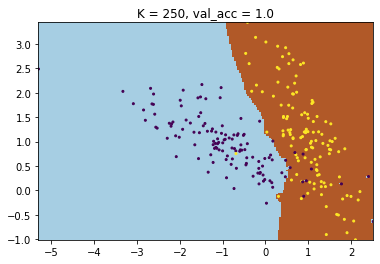

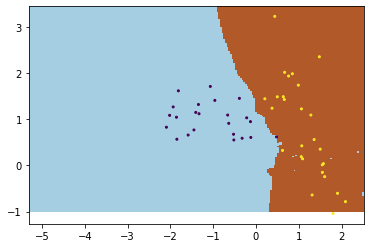

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=250,weights='distance',metric='minkowski',p=2)
knn_model.fit(x_train,y_train)

h=200
xx, yy = np.meshgrid(np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), h), np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]), h))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.imshow(Z, interpolation="nearest",
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)

y_pred = knn_model.predict(x_val)
acc = accuracy_score(y_val,y_pred)

plt.title('K = 250, val_acc = {}'.format(acc))

plt.figure()
plt.imshow(Z, interpolation="nearest",
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(x_val[:,0],x_val[:,1],c=y_val,s=4)

### Efecto de la métrica

'Zoom en [(0,1),(0,1)]'

Text(0.5, 1.0, 'K = 250')

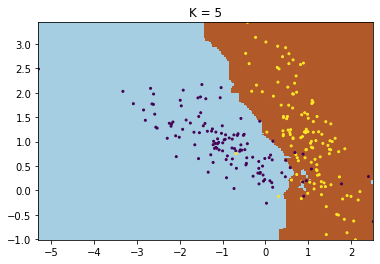

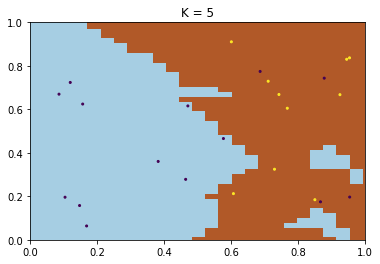

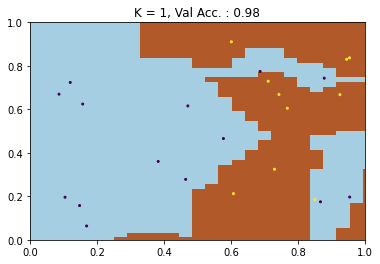

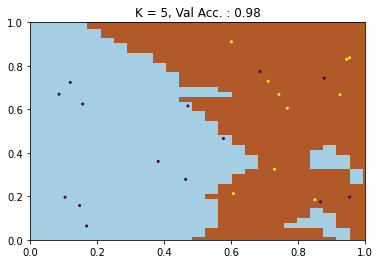

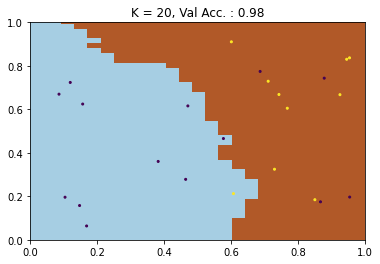

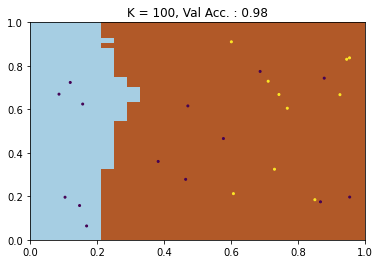

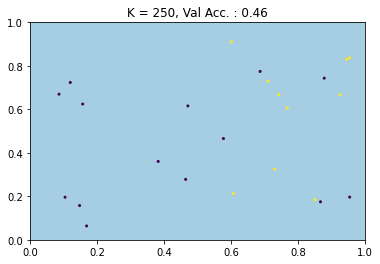

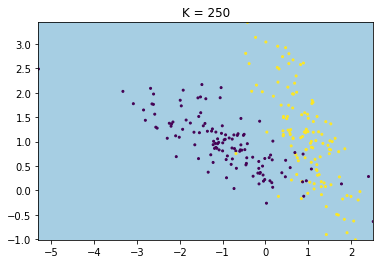

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train = x[:250]
y_train = y[:250]
x_val = x[250:]
y_val = y[250:]

knn_model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',p=1)
knn_model.fit(x_train,y_train)

h=200
xx, yy = np.meshgrid(np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), h), np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]), h))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1)
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)
plt.title('K = 5')

display('Zoom en [(0,1),(0,1)]')
plt.figure()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)
plt.xlim((0,1))
plt.ylim((0,1))
plt.title('K = 5')

metrics = []

for i in [1,5,20,100,250]:
  knn_model = KNeighborsClassifier(n_neighbors=i,weights='uniform',metric='minkowski',p=1)
  knn_model.fit(x_train,y_train)

  h=200
  xx, yy = np.meshgrid(np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), h), np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]), h))
  Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure()
  plt.imshow(Z, interpolation="nearest",
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired, aspect="auto", origin="lower")

  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)
  plt.xlim((0,1))
  plt.ylim((0,1))
  
  y_pred = knn_model.predict(x_val)
  acc = accuracy_score(y_val,y_pred)
  metrics.append(acc)

  plt.title('K = {}, Val Acc. : {}'.format(i,acc))

plt.figure()
plt.imshow(Z, interpolation="nearest",
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=4)
plt.title('K = {}'.format(i))

### Efecto de la dimensionalidad

Efecto de variables no informativas

100%|██████████| 100/100 [00:32<00:00,  3.07it/s]


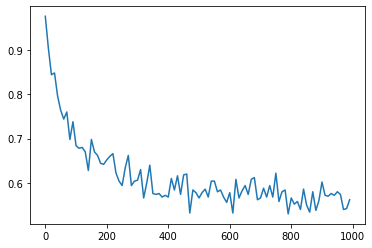

In [ ]:
import tqdm

metrics_d = []
d = []
for i in tqdm.tqdm(range(0,1000,10)):
  x,y = make_classification(n_samples=1000,n_features=i+2,n_classes=2,
                            n_redundant=0,n_informative=2,
                            n_clusters_per_class=1,random_state=48)
  
  x_train = x[:500]
  y_train = y[:500]
  x_val = x[500:]
  y_val = y[500:]
  
  knn_model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',p=2)
  knn_model.fit(x_train,y_train)

  y_pred = knn_model.predict(x_val)
  acc = accuracy_score(y_val,y_pred)
  metrics_d.append(acc)
  d.append(i)
  
plt.plot(d,metrics_d)

### Efecto de la escala

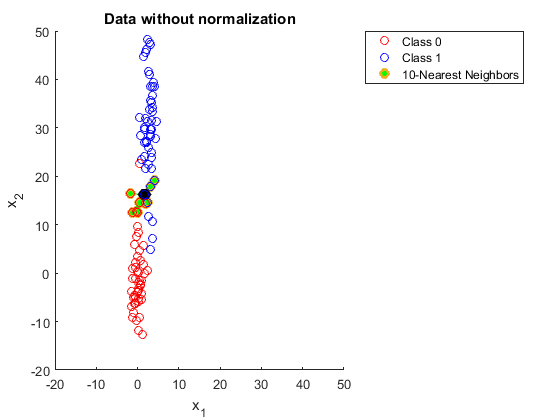

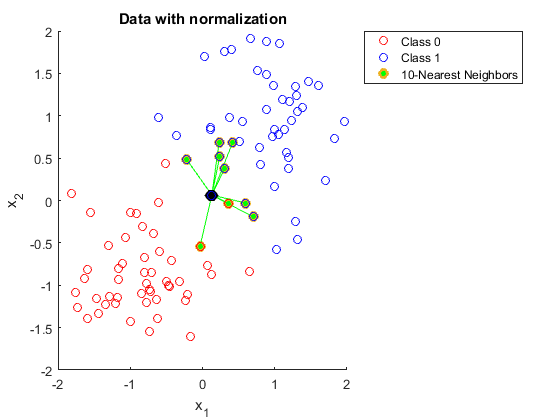

https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn

In [ ]:
x,y = make_classification(n_samples=300,n_features=2,n_classes=2,
                          n_redundant=0,n_informative=2,
                          n_clusters_per_class=1,random_state=48)

x[:,0] = (x[:,0] + 15)*10

print('Media x: {}'.format(np.mean(x[:,0])))
print('SD x: {}'.format(np.std(x[:,0])))

print('Media y: {}'.format(np.mean(x[:,1])))
print('SD y: {}'.format(np.std(x[:,1])))

Media x: 150.170457003932
SD x: 12.8209044905193
Media y: 1.001583695097914
SD y: 0.7951156020369388


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
print('Media x: {}'.format(np.mean(x[:,0])))
print('SD x: {}'.format(np.std(x[:,0])))

print('Media y: {}'.format(np.mean(x[:,1])))
print('SD y: {}'.format(np.std(x[:,1])))

Media x: 6.7442348002562846e-15
SD x: 0.9999999999999999
Media y: 5.921189464667501e-17
SD y: 0.9999999999999997


### Maldición de la dimensionalidad

1) Los puntos se alejan a mayor dimensionalidad.


$D((x_1,y_1),(x_2,y_2))=\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$

Si agregamos dimensiones, se agregarán más términos no negativos, y por ende, la distancia en función de la dimensionalidad es creciente.



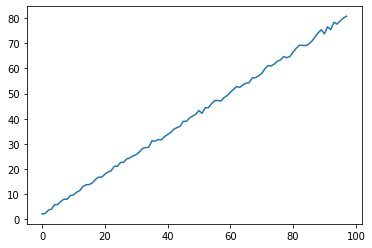

In [ ]:
mpd = []
stdpd = []
for i in range(2,100):
  x,y = make_classification(n_samples=100,n_features=i,n_classes=2,
                            n_redundant=0,n_informative=i,
                            n_clusters_per_class=1)
  mpd.append(pairwise_distances(x,x).mean())
  pwd_nodiag = pairwise_distances(x,x)[pairwise_distances(x,x)>0]
  stdpd.append(pwd_nodiag.std)

plt.plot(mpd)

2) Los puntos tienden alejarse de un centro y quedar en 'esquinas'

Esto es porque a medida que agregamos más y más dimensiones, la probabilidad de que alguna posea valores muy altos o bajos aumenta.

3) **Las distancias entre todos los pares de puntos tiende a ser la misma! Los dos puntos más cercanos tendrán una distancia similar a los dos más lejanos.**


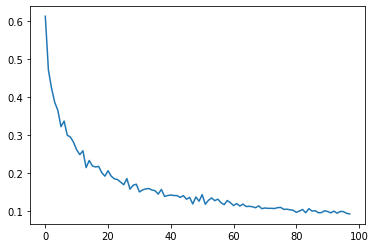

In [ ]:
import numpy as np
plt.plot(np.array(stdpd)/np.array(mpd))

4) El error de un modelo tiende a cero a mayor número de dimensiones.

En un espacio lo suficientemente grande es posible construir fronteras de decisión que separen perfectamente los datos.

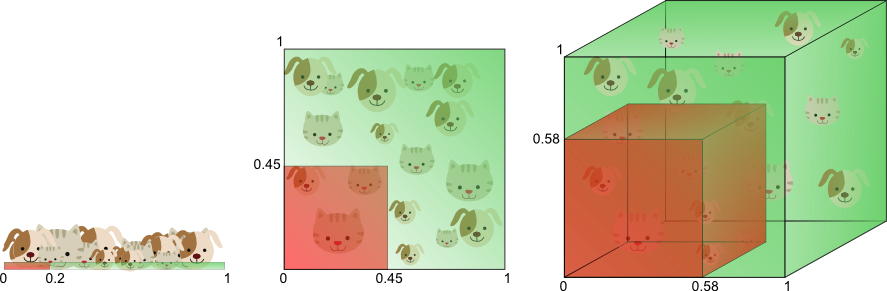

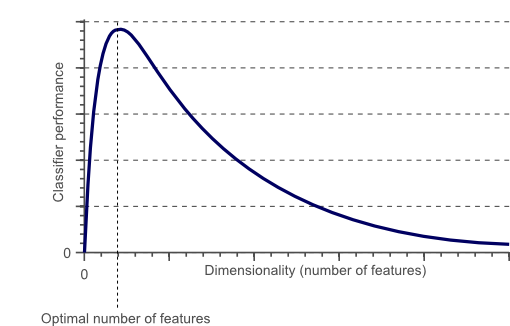

### Referencias


**Curse of dimensionality**

https://www.youtube.com/watch?v=zwAD6dRSVyI

https://blog.dominodatalab.com/the-curse-of-dimensionality/

Capítulo 1.4 de Pattern Recognition and Machine Learning - Christopher Bishop

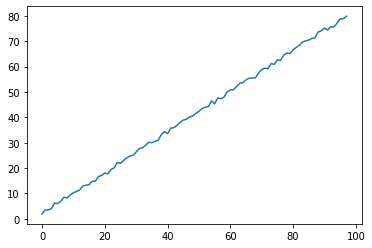

### Ejercicio de Tarea

Entrenar algoritmo de KNN para clasificar especies de Iris, especificamente 'setosa', 'versicolor' y 'virginica'.

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

1) Separar los datos aleatoriamente en 2 conjuntos: entrenamiento y evaluación utilizando las proporciones fernet-cola (70-30). Se puede utilizar la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) de scikit-learn. Opcionalmente, investigar el efecto del parámetro stratify.

2) Entrenar clasificadores KNN utilizando el conjunto de entrenamiento explorando distintos valores de K vecinos, métricas y weights. ¿Es necesario escalar los atributos?

3) Analizar el accuracy_score que se obtiene para los distintos modelos en el conjunto de evaluación.

Opcional:

1) Investigar el clasificador [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html?highlight=radius%20classifier#sklearn.neighbors.RadiusNeighborsClassifier)

2) Comparar el mejor clasificador KNN contra un árbol de decisión. Explorar la profundidad máxima, el ccp_alpha (parámetro de poda). ¿Qué interacción existe entre la profundidad máxima y el ccp_alpha? ¿Con qué profundidades máximas exploraría el parámetro de poda?

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()
x = iris_data['data']
y = iris_data['target']